# We'll be using HDF5 files to organize and store the data
## Install the h5py package: http://docs.h5py.org/en/stable/

In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import polarization_functions
import coordinate_conversions
import CDS
from importlib import reload

In [69]:
reload(CDS)

<module 'CDS' from '/home/gin/projects/StellarPolarization2020/CDS.py'>

# Create a HDF5 file. 
## This will serve as your local Table which you will fill with published data. At the end of the hackathon, we will merge all individual HDF5 files into one table.

In [134]:
# Create an hdf5 file to write
f = h5py.File('table_Gina.hdf5', 'a') # 'w' option will clean any existing file with this name, 
#                                        use 'a' to append to an existing file

## For the hackathon, the structure of the HDF5 file will be the following:

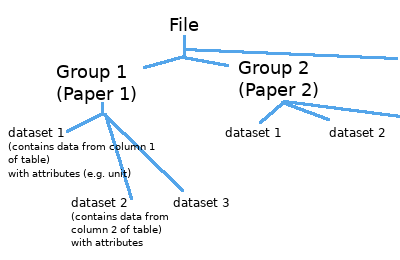

# Example: Add data from a published paper to your personal HDF5 File

## Read the catalog of Panopoulou+2019b (downloaded from the CDS)

In [70]:
# Use the custom-made function that reads Readme and table files that are in the CDS format
## Caution! I've only tested this for a couple use-cases. May need tweaking to work for your case.

catalogdir = 'published_data/Panopoulou2019b/'

# Create a dictionary that stores all data in the table sorted in columns
column_dictionary = CDS.read_table(catalogdir+'Readme.txt', catalogdir+'table.dat')

In [86]:
# Print the column names to see what's in it
print(column_dictionary.keys())

# Let's look at the data in the 'P' column
print(column_dictionary['P'])

# Each dictionary entry is a list with 3 entries. 
# The last entry of the list contains the data in the form of a 1d numpy array
Pdatacolumn = column_dictionary['P']

dict_keys(['Gaia', 'USNOB', 'RAdeg', 'DEdeg', 'Q', 'e_Q', 'U', 'e_U', 'P', 'e_P', 'dP', 'theta', 'e_theta', 'Dist', 'e_Dist', 'E_Dist'])
[85, 91, <class 'numpy.float64'>, array([0.01543, 0.00909, 0.00411, 0.01148, 0.01338, 0.00295, 0.01596,
       0.01385, 0.00261, 0.01351, 0.00979, 0.01214, 0.00291, 0.01644,
       0.01371, 0.01068, 0.01058, 0.01095, 0.01565, 0.01397, 0.01102,
       0.01483])]


## First, let's create a new Group object that will hold all the data associated with this paper

In [121]:
grp = f.create_group('Panopoulou2019b')

## We can store metadata about this publication as attributes to the Group

In [123]:
f['Panopoulou2019b'].attrs['Instrument'] = 'RoboPol'
f['Panopoulou2019b'].attrs['ADSlink'] = 'https://ui.adsabs.harvard.edu/abs/2019A%26A...624L...8P/abstract'

In [124]:
# List the attributes we just created
print(f['Panopoulou2019b'].attrs.keys())

<KeysViewHDF5 ['ADSlink', 'Instrument']>


## Now, let's add the 'P' column data as a new dataset object

In [125]:
f['Panopoulou2019b'].create_dataset('P', data = column_dictionary['P'][3])

# We can specify an attribute to the dataset, e.g. what the unit is
f['Panopoulou2019b']['P'].attrs['unit'] = 'fraction'
f['Panopoulou2019b']['P'].attrs['info'] = 'biased p'
f['Panopoulou2019b']['P'].attrs['Filter'] = 'R'

In [126]:
# Show what attributes we stored
f['Panopoulou2019b']['P'].attrs.keys()

<KeysViewHDF5 ['Filter', 'info', 'unit']>

## Loop over all columns in the dictionary and add the data in

In [127]:
for key in column_dictionary.keys():
    try:
        f['Panopoulou2019b'].create_dataset(key, data = column_dictionary[key][3])
    except:
        continue

## Example flag usage: Let's say that we know the first source is intrinsically polarized

In [135]:
# Create a column of length equal to the number of sources
ip_flag = np.zeros_like(column_dictionary['P'][3])
# Set intrinsically polarized flag to 1 for the source that is bad
ip_flag[0] = 1

# Add this column to the group
f['Panopoulou2019b']['ip_flag'] = ip_flag
f['Panopoulou2019b']['ip_flag'].attrs['Comment'] = 'flag = 1 -> Intrinsically polarized, flag = 0 -> not'

## Visualize the structure of the file

In [136]:
def printname(name):
    print(name)
    
f.visit(printname)

Panopoulou2019b
Panopoulou2019b/DEdeg
Panopoulou2019b/Dist
Panopoulou2019b/E_Dist
Panopoulou2019b/Gaia
Panopoulou2019b/P
Panopoulou2019b/Q
Panopoulou2019b/RAdeg
Panopoulou2019b/U
Panopoulou2019b/dP
Panopoulou2019b/e_Dist
Panopoulou2019b/e_P
Panopoulou2019b/e_Q
Panopoulou2019b/e_U
Panopoulou2019b/e_theta
Panopoulou2019b/ip_flag
Panopoulou2019b/theta


## Close the file when you're done

In [115]:
f.close()